In [11]:
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install pandas
!pip install names

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.1/789.1 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803681 sha256=1802de2d6dc9e35952d4bdbc7ad04ffda8929afd396204564f52ab973fe44398
  Stored in directory: /root/.cache/pip/wheels/8d/db/fc/50ec19a89a8dcbbd158a4aae44123cb525cda1f07dae287197
Successfully built names


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import seaborn as sns
import pandas as pd
import plotly.express as px
import names

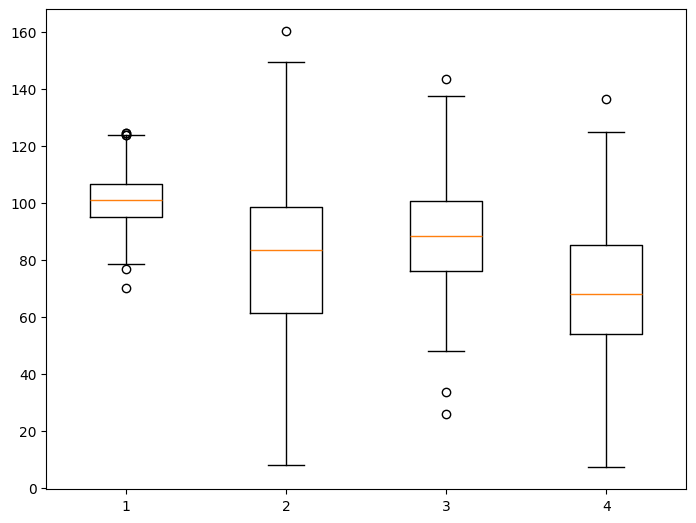

In [10]:
np.random.seed(10)
collection_1 = np.random.normal(100,10,200)
collection_2 = np.random.normal(80,30,200)
collection_3 = np.random.normal(90,20,200)
collection_4 = np.random.normal(70,25,200)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

bp = ax.boxplot([collection_1,collection_2,collection_3,collection_4])
plt.show()


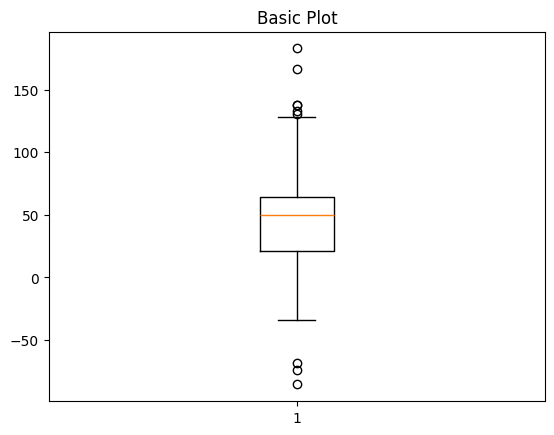

In [14]:
np.random.seed(19680001)
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)
plt.show()

<Axes: xlabel='group', ylabel='value'>

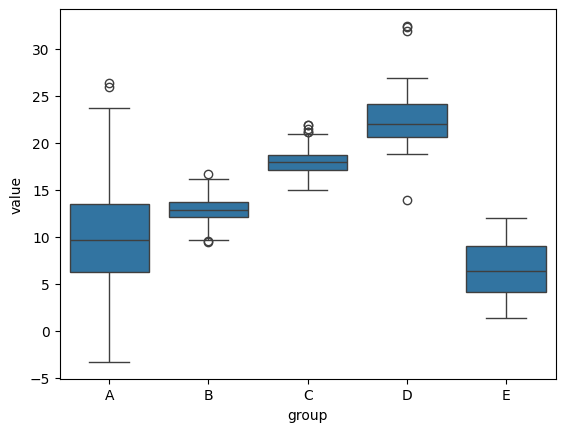

In [25]:


a = pd.DataFrame({'group': np.repeat('A',500),'value': np.random.normal(10,5,500)})
b = pd.DataFrame({'group': np.repeat('B',500),'value': np.random.normal(13,1.2,500)})
c = pd.DataFrame({'group': np.repeat('C',500),'value': np.random.normal(18,1.2,500)})
d = pd.DataFrame({'group': np.repeat('D',20),'value': np.random.normal(25,4,20)})
e = pd.DataFrame({'group': np.repeat('E',100),'value': np.random.uniform(12,size=100)})
# Use pd.concat instead of append to combine the DataFrames
df = pd.concat([a, b, c, d, e], ignore_index=True) # ignore_index=True resets the index in the combined DataFrame

sns.boxplot(x='group', y='value', data=df)

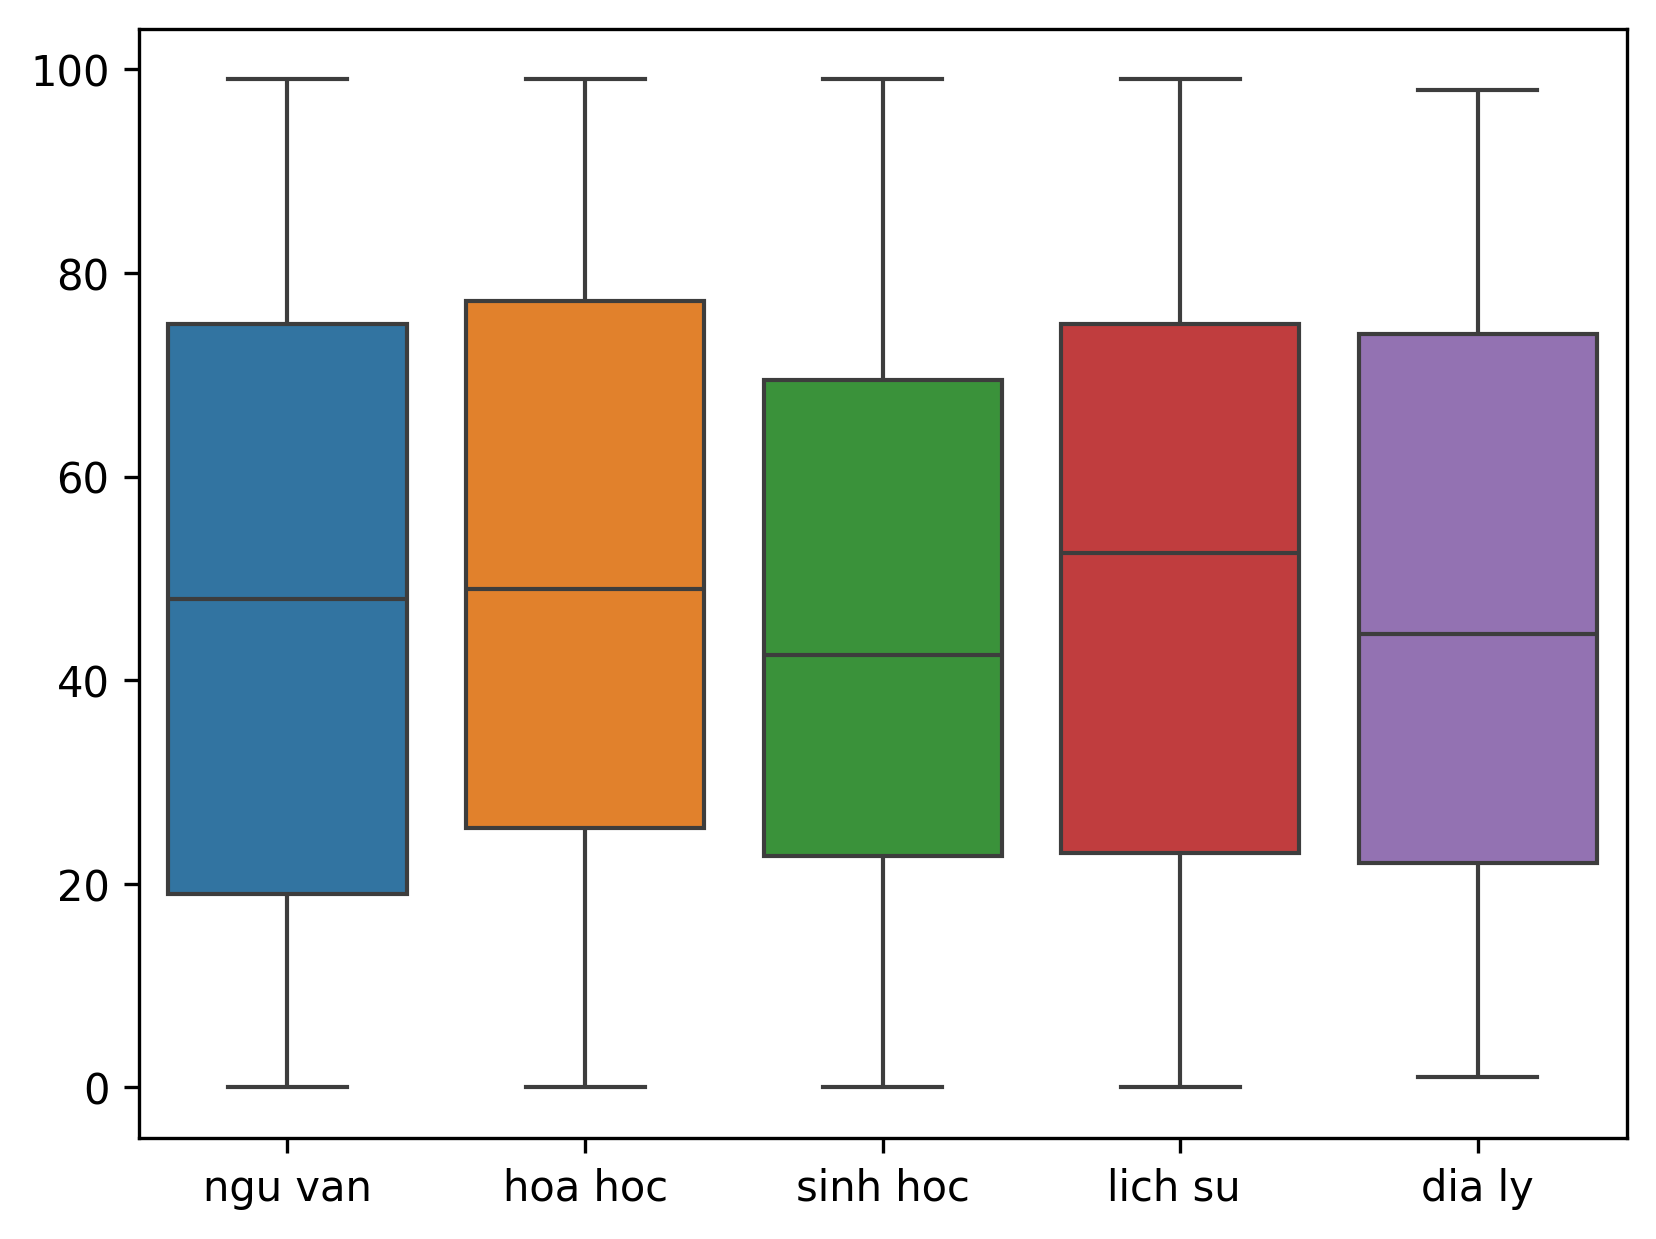

In [29]:
df = pd.DataFrame(np.random.randint(0,100,size=(100, 5)), columns=['ngu van','hoa hoc','sinh hoc','lich su ','dia ly'])
df['studen_names'] = [names.get_full_name() for _ in range(100)]
df.set_index('studen_names', inplace=True)


ax = sns.boxplot(data=df)
plt.rcParams["figure.dpi"] = 300
plt.show()

<ipython-input-2-3421f77cf52b>:9: MatplotlibDeprecationWarning: Passing the NFFT parameter of csd() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.csd(s1,s2**2 , 120 , 1./dt)


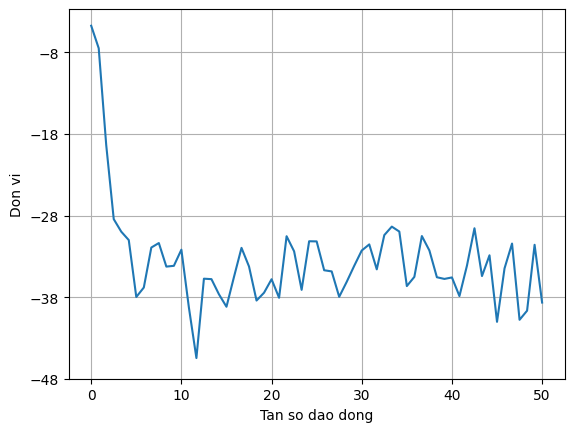

In [2]:
dt = 0.01
t = np.arange(0,30,dt)
nse1 =  np.random.rand(len(t))
nse2 =  np.random.rand(len(t))

s1 = 1.5 * np.sin(2 * np.pi * 1.25 * t) + nse1
s2 = np.cos(2 * np.pi * t) + nse2

plt.csd(s1,s2**2 , 120 , 1./dt)
plt.xlabel('Tan so dao dong')
plt.ylabel('Don vi')

plt.show()

<ipython-input-3-a410f424bef5>:13: MatplotlibDeprecationWarning: Passing the NFFT parameter of psd() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.psd(s,512,1./dt)


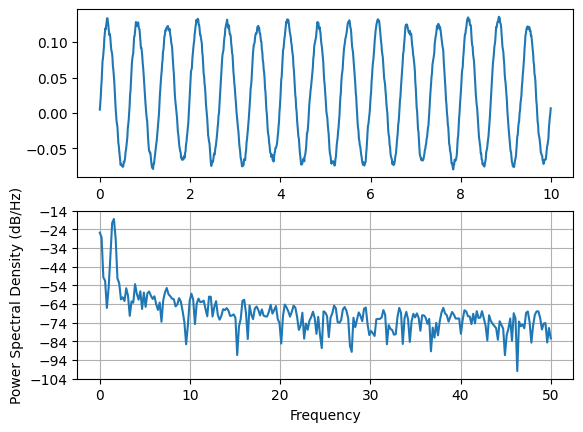

In [3]:
np.random.seed(19680001)

dt = 0.01
t = np.arange(0,10,dt)
nse =np.random.rand(len(t))
r = np.exp(-t/0.05)
cnse = np.convolve(nse,r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * 1.5 * t) + cnse
plt.subplot(211)
plt.plot(t,s)
plt.subplot(212)
plt.psd(s,512,1./dt)
plt.show()

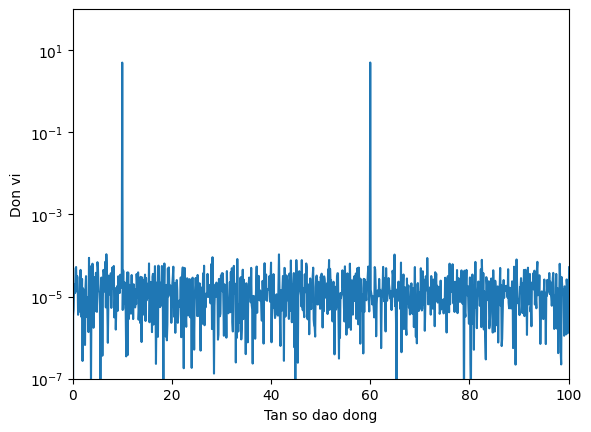

In [7]:
fs = 1000.0
F1 = 10
F2 = 60
T = 10
N0 = -10
t = np.r_[0 : T :(1/fs)]

signal = np.sin(2 * F1 * np.pi * t ) + np.sin(2 * F2 * np.pi * t)

signal += np.random.rand(len(t)) * 10 **(N0/20.0)
(f,s) = scipy.signal.periodogram(signal,fs,scaling='density')

plt.semilogy(f,s)
plt.ylim([1e-7,1e2])
plt.xlim([0,100])
plt.xlabel('Tan so dao dong')
plt.ylabel('Don vi')
plt.show()


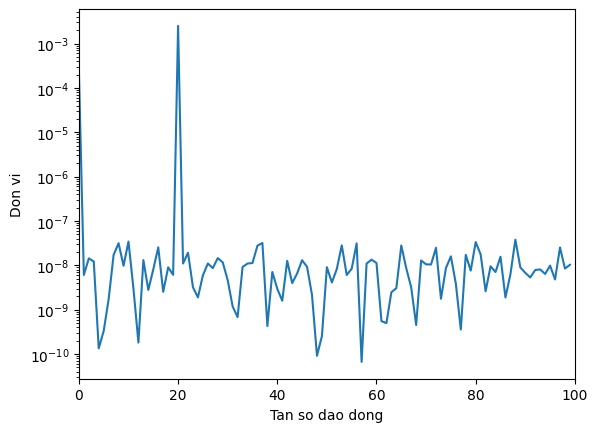

In [9]:
def Sxx(f , signal ,Fs):
  t = 1/Fs
  T = len(signal)

  s= np.sum([signal[i] * np.exp(-1j * np.pi * f * i * t) for i in range(T)])
  return t**2 / T * np.abs(s)**2

S = [Sxx(f,signal,fs) for f in range(100)]
plt.semilogy([f for f in range(100)], S)
plt.xlim([0,100])
plt.xlabel('Tan so dao dong')
plt.ylabel('Don vi')

plt.show()